In [8]:
library(dplyr)

In [9]:
library(MASS)

In [10]:
library(caret) #sample
library(nnet) #인공신경망 , 다항 로지스틱 회귀분석
library(e1071) # svm
library(randomForest) # randomForest
library(party) # 의사결정나무 ctree



In [11]:


#입력 데이터, 정규화할 컬럼인덱스 벡터
fun_x <- function(f_df,cindex,targetcol){

    
# 표준화

f_df2 <- f_df
f_df2[,cindex] <- as.data.frame(scale(f_df[,cindex]))

# 샘플나누기

tindex = 0
for(i in 1:ncol(f_df2)){
    if(colnames(f_df2)[i] == targetcol){
        tindex = i
    }
}
    
sampling <- function(){
samp <<- createDataPartition(f_df2[,tindex] , p = 0.7,list = F)
data.tr <<- f_df2[samp,]
data.test <<- f_df2[-samp,]

x <<- data.test[,-tindex]
y <<- data.test[,tindex]
    
}    
    
set.seed(1235)

sampling() 
    
head(samp)

#인공신경망 테스트
ANN <- function(data.tr , data.test , x , y ){
    
    model.nnet <- nnet(cluster ~ . , data=data.tr, size = 3)
    pred <- predict(model.nnet , x , type = "class")
    cat("인공신경망의 예측력은" ,mean(pred == y), "입니다.")
#     print(pred)
    print(table(pred,y))
    return(mean(pred == y))
}

#의사결정 나무 
CTREE <-function(data.tr , data.test , x , y ){
    model.ctree <- ctree(cluster ~ . , data=data.tr)
    pred <- predict(model.ctree , x )
    cat("의사결정 나무의 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
}

#RandomForesst
RandomForest<-function(data.tr , data.test , x , y ){
    model.rf <- randomForest(cluster ~ . , data=data.tr, ntree = 100)
    pred <- predict(model.rf , x )
    cat("랜덤포레스트 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#SVM
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(cluster ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("SVM의 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

#Logistic regression
Logisticreg <-function(data.tr , data.test , x , y ){
    model.log <- multinom(cluster ~ . , data=data.tr)
    pred <- predict(model.log , x )
    cat("로지스틱 회귀의 예측력은" ,mean(pred == y), "입니다.")
    print(table(pred,y))
    return(mean(pred == y))
} 

 a <- rep(0,5)
b<- rep(0,5)
iteration <- 20
    
data.test2 <- f_df2[samp,]

x2 <- data.test2[,-tindex]
y2 <- data.test2[,tindex]
for(i in 1:iteration){
    set.seed(i)
    a = a + c(
            ANN(data.tr , data.test , x , y ),
            CTREE(data.tr , data.test , x , y ),
             RandomForest(data.tr , data.test , x , y ),
            SVM(data.tr , data.test , x , y ),
            Logisticreg(data.tr , data.test , x , y )
    )
    b = b + c(
        ANN(data.tr , data.test2 , x2 , y2 ),
        CTREE(data.tr , data.test2 , x2 , y2 ),
         RandomForest(data.tr , data.test2 , x2 , y2 ),
        SVM(data.tr , data.test2 , x2 , y2 ),
        Logisticreg(data.tr , data.test2 , x2 , y2 )
    )
}
print(a)
print(b)
a<- a/iteration
b<- b/iteration

result<<-data.frame(train = b,test = a)
 rownames(result) = c("인공신경망","의사결정나무","RandomForest","SVM","로지스틱회귀분석")
#rownames(result) = c("인공신경망","의사결정나무","SVM","로지스틱회귀분석")
result
}




In [22]:

df <-read.csv("../movies2/fortest1.csv",fileEncoding = 'utf-8')
df10<-df
head(df)


cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.00,2.000000,0.00,0.000000
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.25,4.062019,8.25,4.062019
1,3117859,36.90476,1,10,0,2.333333,4.000000,8.25,4.062019,8.25,4.062019
1,4313101,35.27944,3,10,3,3.571429,6.777778,8.25,4.509250,8.25,4.509250
1,3024666,21.64329,3,10,0,3.500000,7.666667,8.25,5.153456,8.25,5.153456
1,4111237,28.49592,2,20,6,3.500000,6.500000,8.25,5.153456,8.25,5.153456


In [45]:
df<- df10[,-c(2,8,9,11,12)]

In [46]:
df2 <- df

df2$cluster <- as.factor(df2$cluster)

In [47]:
str(df2)

'data.frame':	108 obs. of  7 variables:
 $ cluster          : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ 스크린점유율     : num  23.8 48.3 36.9 35.3 21.6 ...
 $ 배급사점수       : int  2 2 1 3 3 2 1 3 1 3 ...
 $ 장르_관객점수부여: int  10 10 10 10 10 20 10 10 10 10 ...
 $ 감독_배우시너지  : int  3 8 0 3 0 6 1 5 7 4 ...
 $ 감독점수         : num  3 2 2.33 3.57 3.5 ...
 $ 배우점수3        : num  2 4.06 4.06 4.51 5.15 ...


In [48]:

fun_x(df2,2:7,'cluster')


# weights:  33
initial  value 90.795584 
iter  10 value 43.403863
iter  20 value 29.531476
iter  30 value 21.905264
iter  40 value 18.655097
iter  50 value 17.254597
iter  60 value 16.512235
iter  70 value 14.179728
iter  80 value 13.168779
iter  90 value 12.970602
iter 100 value 12.896790
final  value 12.896790 
stopped after 100 iterations
인공신경망의 예측력은 0.7096774 입니다.    y
pred  1  2  3
   1 12  3  0
   2  0  3  1
   3  0  5  7
의사결정 나무의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 10  0  0
   2  2  5  0
   3  0  6  8
랜덤포레스트 예측력은 0.8387097 입니다.    y
pred  1  2  3
   1 12  2  0
   2  0  7  1
   3  0  2  7
SVM의 예측력은 0.6451613 입니다.    y
pred  1  2  3
   1 10  3  1
   2  1  6  3
   3  1  2  4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 47.610575
iter  20 value 31.848905
iter  30 value 24.271161
iter  40 value 24.097991
iter  50 value 24.087799
final  value 24.075371 
converged
로지스틱 회귀의 예측력은 0.8064516 입니다.    y
pred  1  2  3
   1 12  3  0
   2  0  6  1
   3  0  2  7


initial  value 84.593146 
iter  10 value 47.610575
iter  20 value 31.848905
iter  30 value 24.271161
iter  40 value 24.097991
iter  50 value 24.087799
final  value 24.075371 
converged
로지스틱 회귀의 예측력은 0.8064516 입니다.    y
pred  1  2  3
   1 12  3  0
   2  0  6  1
   3  0  2  7
# weights:  33
initial  value 89.143370 
iter  10 value 44.958897
iter  20 value 30.839397
iter  30 value 25.680439
iter  40 value 21.923659
iter  50 value 21.668229
iter  60 value 21.573006
iter  70 value 21.553814
iter  80 value 21.546738
iter  90 value 21.536340
iter 100 value 21.501002
final  value 21.501002 
stopped after 100 iterations
인공신경망의 예측력은 0.8701299 입니다.    y
pred  1  2  3
   1 30  1  0
   2  0 17  0
   3  1  8 20
의사결정 나무의 예측력은 0.7272727 입니다.    y
pred  1  2  3
   1 23  0  0
   2  8 13  0
   3  0 13 20
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.7402597 입니다.    y
pred  1  2  3
   1 25  4  0
   2  6 20  8
   3  0  2 12
# weights:  24 (14 variable)
initial 

initial  value 84.593146 
iter  10 value 47.610575
iter  20 value 31.848905
iter  30 value 24.271161
iter  40 value 24.097991
iter  50 value 24.087799
final  value 24.075371 
converged
로지스틱 회귀의 예측력은 0.8701299 입니다.    y
pred  1  2  3
   1 30  1  0
   2  1 20  3
   3  0  5 17
# weights:  33
initial  value 87.845533 
iter  10 value 39.986785
iter  20 value 28.688953
iter  30 value 21.390822
iter  40 value 17.412519
iter  50 value 17.323504
iter  60 value 17.323248
final  value 17.323243 
converged
인공신경망의 예측력은 0.8387097 입니다.    y
pred  1  2  3
   1 12  3  0
   2  0  6  0
   3  0  2  8
의사결정 나무의 예측력은 0.7419355 입니다.    y
pred  1  2  3
   1 10  0  0
   2  2  5  0
   3  0  6  8
랜덤포레스트 예측력은 0.8387097 입니다.    y
pred  1  2  3
   1 12  2  0
   2  0  7  1
   3  0  2  7
SVM의 예측력은 0.6451613 입니다.    y
pred  1  2  3
   1 10  3  1
   2  1  6  3
   3  1  2  4
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 47.610575
iter  20 value 31.848905
iter  30 value 24.271161
iter  40 value 24.

initial  value 84.593146 
iter  10 value 47.610575
iter  20 value 31.848905
iter  30 value 24.271161
iter  40 value 24.097991
iter  50 value 24.087799
final  value 24.075371 
converged
로지스틱 회귀의 예측력은 0.8064516 입니다.    y
pred  1  2  3
   1 12  3  0
   2  0  6  1
   3  0  2  7
# weights:  33
initial  value 88.256801 
iter  10 value 49.600709
iter  20 value 34.635296
iter  30 value 23.631060
iter  40 value 19.190940
iter  50 value 18.403861
iter  60 value 16.497698
iter  70 value 14.315218
iter  80 value 14.092597
iter  90 value 13.920019
iter 100 value 13.458254
final  value 13.458254 
stopped after 100 iterations
인공신경망의 예측력은 0.9480519 입니다.    y
pred  1  2  3
   1 30  1  0
   2  1 23  0
   3  0  2 20
의사결정 나무의 예측력은 0.7272727 입니다.    y
pred  1  2  3
   1 23  0  0
   2  8 13  0
   3  0 13 20
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.7402597 입니다.    y
pred  1  2  3
   1 25  4  0
   2  6 20  8
   3  0  2 12
# weights:  24 (14 variable)
initial 

initial  value 84.243940 
iter  10 value 43.794506
iter  20 value 30.166951
iter  30 value 20.754076
iter  40 value 14.883808
iter  50 value 12.789891
iter  60 value 11.351003
iter  70 value 11.098178
iter  80 value 11.012495
iter  90 value 10.894170
iter 100 value 10.711890
final  value 10.711890 
stopped after 100 iterations
인공신경망의 예측력은 0.9480519 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 22  0
   3  0  4 20
의사결정 나무의 예측력은 0.7272727 입니다.    y
pred  1  2  3
   1 23  0  0
   2  8 13  0
   3  0 13 20
랜덤포레스트 예측력은 1 입니다.    y
pred  1  2  3
   1 31  0  0
   2  0 26  0
   3  0  0 20
SVM의 예측력은 0.7402597 입니다.    y
pred  1  2  3
   1 25  4  0
   2  6 20  8
   3  0  2 12
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 47.610575
iter  20 value 31.848905
iter  30 value 24.271161
iter  40 value 24.097991
iter  50 value 24.087799
final  value 24.075371 
converged
로지스틱 회귀의 예측력은 0.8701299 입니다.    y
pred  1  2  3
   1 30  1  0
   2  1 20  3
   3  0  5 17
# weights:  33
initial 

,train,test
인공신경망,0.9116883,0.7919355
의사결정나무,0.7272727,0.7419355
RandomForest,0.9993506,0.8532258
SVM,0.7402597,0.6451613
로지스틱회귀분석,0.8701299,0.8064516


In [50]:
#배우점수4
result

train,test
0.9116883,0.7919355
0.7272727,0.7419355
0.9993506,0.8532258
0.7402597,0.6451613
0.8701299,0.8064516


In [49]:
#배우점수3
result

train,test
0.9116883,0.7919355
0.7272727,0.7419355
0.9993506,0.8532258
0.7402597,0.6451613
0.8701299,0.8064516


In [44]:
#배우점수2
result

train,test
0.9915584,0.9306452
0.9220779,0.9354839
1.0000000,0.9500000
0.8831169,0.8064516
0.9740260,0.9354839


In [39]:
#SVM, 의사결정나무, 로지스틱회귀분석은 할때 마다 난수 생성을 안하는 듯 (샘플링 난수에만 영향을 받는다.)
result

train,test
0.8337662,0.6516129
0.6363636,0.6129032
1.0000000,0.6709677
0.7662338,0.6774194
0.7272727,0.7096774


In [16]:
#1234
result

train,test
0.9311688,0.8032258
0.8441558,0.8387097
0.9993506,0.8612903
0.8701299,0.8709677
0.8441558,0.8387097


In [163]:
#1235
result

train,test
0.9311688,0.8032258
0.8441558,0.8387097
0.9993506,0.8612903
0.8701299,0.8709677
0.8441558,0.8387097


In [158]:
#1236
result

train,test
0.9577922,0.6322581
0.8701299,0.7741935
0.9993506,0.7854839
0.9090909,0.7419355
0.8701299,0.7096774


In [ ]:
# 요까지가 머신러닝


In [18]:

genre4 <- df

In [93]:
scale<-function(x){
    return((x-min(x))/(max(x)-min(x)))
}

In [99]:
df5<-as.data.frame(lapply(df[,-1],scale))

In [108]:
head(df5,1)

감독_주연조연시너지수,스크린점유율,배우점수
0.4285714,0.5726291,0.625


In [113]:
head(df)

cluster,감독_주연조연시너지수,스크린점유율,배우점수
7232387,6,46.96312,16.0
2535450,0,17.21519,7.0
2963652,0,29.36088,6.5
2242510,3,41.13475,7.0
4039891,3,23.79760,4.0
12811213,0,39.65201,25.0


- lapply 함수는 list + apply를 의미하는 이름의 함수 
- 실행 결과가 list 형태로 출력되는데, 리스트(list)의 인자는 length( 데이터 ) 만큼 생성된다.
- 참고로 데이터프레임(data frame)인 경우 length( 데이터 )의 결과는 변수의 개수(열의 개수)이고, 리스트인 경우 length( 데이터 )는 리스트 인자의 개수이다.


In [112]:
model = knnreg(cluster ~ ., data = df)
model

5-nearest neighbor regression model

In [114]:

inTrain <- createDataPartition(df, p = .7)[[1]]

Warning message in createDataPartition(df, p = 0.7):
“Some classes have no records (  ) and these will be ignored”Warning message in createDataPartition(df, p = 0.7):
“Some classes have a single record (  ) and these will be selected for the sample”

In [119]:
head(df)

cluster,감독_주연조연시너지수,스크린점유율,배우점수
7232387,6,46.96312,16.0
2535450,0,17.21519,7.0
2963652,0,29.36088,6.5
2242510,3,41.13475,7.0
4039891,3,23.79760,4.0
12811213,0,39.65201,25.0


In [121]:
str(df)

'data.frame':	209 obs. of  4 variables:
 $ cluster              : int  7232387 2535450 2963652 2242510 4039891 12811213 3678156 2598859 2368267 4529876 ...
 $ 감독_주연조연시너지수: int  6 0 0 3 3 0 8 4 0 4 ...
 $ 스크린점유율         : num  47 17.2 29.4 41.1 23.8 ...
 $ 배우점수             : num  16 7 6.5 7 4 25 8.25 5 3 5 ...


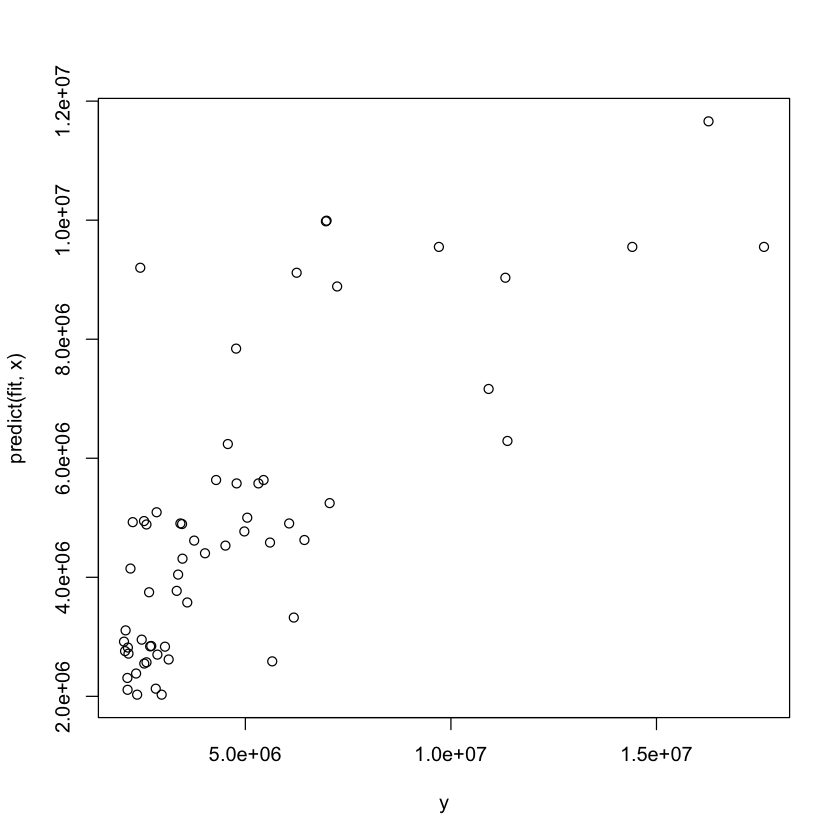

In [122]:
# NOT RUN {

samp <- createDataPartition(df[,1] , p = 0.7,list = F)
data.tr <- df[samp,]
data.test <- df[-samp,]

x <- data.test[,-1]
y <- data.test[,1]

fit <- knnreg(data.tr[,2:4],data.tr[,1], k = 3)

plot(y, predict(fit, x))

# }


In [123]:
predict(fit, x)

[1]  8885933  9550709  5634348  2619323  4770254  7164133  4616623  7842121
 [9]  3577098  4904591  2701067 11660471  6238847  2128651  5577357  4583602
[17]  2551018  9991332  2819592  3108072  9550709  2383605  2109987  2759870
[25]  4146822  6290678  5577357  4894923  2028071  2952525  9116441  3748546
[33]  2919036  2845783  2834252  2839539  2028071  9550709  2717816  5634348
[41]  4887446  3323448  4045532  4532424  4403405  4626263  2571617  9980781
[49]  5246402  4904591  9200756  4944670  2587678  2308924  5001496  4312958
[57]  3771988  5092684  9032815  4926661

In [101]:
CrossTable(x = genre5.testLabels, y = genre5_model, prop.chisq = FALSE )


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  59 

 
                  | genre5_model 
genre5.testLabels |   5317959 |   5508017 |   8666208 |   9707581 |  12706483 |  12983330 |  14411775 |  17615039 | Row Total | 
------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
                0 |         1 |         6 |         4 |         0 |         0 |         6 |         6 |         4 |        27 | 
                  |     0.037 |     0.222 |     0.148 |     0.000 |     0.000 |     0.222 |     0.222 |     0.148 |     0.458 | 
                  |     0.500 |     0.545 |     0.444 |     0.000 |     0.000 |     0.353 |     0.500 |     0.667 |           | 
                  |     0.017 |     0.102 |     0.068 |     0.000 |     0.000 |     0.102 |   

In [125]:
library(knitr)

In [123]:
.Random.seed

[1]       10403         624 -1564105589   103469648  -280462831  -984769378
  [7] -1934069625  2112878364    -3060371  -923367094   -72437181   473245352
 [13]  1882094729 -1374310730   804398527  -695079692   685187941  -998737694
 [19]  -344045829  1152685568  -969269759  -837741618  -176401929   917384652
 [25]  -811988899   421686138  1266631347   771653720  1101610617  1798056934
 [31]  1015010607  -983557724   149281877 -1466515182  1771603307  -749451856
 [37]  -944390671  -450930946  1753321319  -747696004    71466829  1224989098
 [43] -2083721437  -496810488 -1709867927  -152111850  -723361633  1489924692
 [49]   192139589  -559671998 -1279565861  -792403616   242899425   678127150
 [55]   945760471   572366636  1912189501 -1522674726  1243527059 -1585547336
 [61]   907163225  1873873478  2022754319 -1373112572  1955594805 -1448905358
 [67] -1706174901  1518430480  1963389393    44581214  -311681465 -1151018532
 [73]   145662253  1932745226   901487619   707466600   167668809  1485138806
 [79]   348261247 -2055755852 -1677103323  -581443166 -1753814853  1019534528
 [85] -2053470783  1531504782 -1245745225 -1297104756 -1005564899   554134586
 [91]  1068145779  1107566360   838409785  -918611802  1953311471  -242711452
 [97]  -579921899   239360466  1058903851 -1567998864  1781798321  -964666434
[103]  -718267097  1177113404 -1685212403  1973226090   850573539  1701090504
[109]  -505328599 -1636757034 -1337383329   132484372 -2012218107 -1045701118
[115] -1360469605  -980645856  -594370143 -1253991698   357901975 -1900244500
[121]  1918227965 -1063832422   458944851  2003269240  1431696921 -1452386554
[127] -1630732849 -1864777276  -822403595 -1651413454   -29374453 -1639530544
[133]   372582801 -1522555362   897944583   806648988   123188461   173599434
[139] -1209383485  1911014440 -1078584311  -532027338  1143976255 -1217387916
[145] -1191216411 -1732769182 -1370928517 -1812733056 -1067799167  1357741390
[151]  1524125047   144446284  -448639011  1141189882  -395856333   360742360
[157]  1008778745 -1915304602  1114128559 -1183600860   279712725   715305618
[163]   434923755   747565872  -469619343  -545382274 -2145096985  -511814148
[169]  1384425165  2004810538   513426083 -1718836344 -1116414999 -2119700842
[175]  1227729951 -1754306604  1414523077  2073323202  -439344293 -1127026976
[181]  -638932639   350523310  -436149161   514213036  1095612861  -144091814
[187]  -838276333  1546073400   -28215847  1074815942 -2047413361  -995210108
[193] -1510344267 -1802492174  1885043147   406509200   982720849 -2116826402
[199] -2101036601  1858002780  1066174637 -1893254262  -604328061 -1842662680
[205]  1897237449   841164022   335222527  -683975372 -1149679963 -1889995998
[211]  1102408763  1090628160  -835021503 -1279340018  1921444663  2066949644
[217]  1727009693 -1294225990   259428339  -147612520   803216825  -709676506
[223]  1815156335   937531876  -832778347  -965620910  2076506795   404908528
[229]  2095056177  1691919678  1730050215 -1741809476  1290230413 -1352029206
[235] -2126279581  2107339336  -326095959  -313291946  -716181025  -768867692
[241] -1946971003    85831554  1244734747   223876512  1044541729 -1407957906
[247]   404906519  1956296556  -224305795  -629918182   199795923   -25316360
[253]  -523979367 -1336463226  -741430961  -999975100    88905077 -1218469966
[259]  1382083467  -820138672   165730577   757378974 -1293310073  -903609828
[265] -1257431955 -1034007478 -1146300093  -373988952 -1109607543   -86957642
[271] -1713095489   261707764 -1623797147   435854306   595283451   -89247488
[277]  -956678911  1216145102  1250642167   221575372  1020893021  1581969018
[283]  1050094003  -170034344 -1661518471  2106875622  2005380143  1200768164
[289]    37833557  1785832466 -1503179669  -872111952  1015913713  1263528446
[295]  1205749351   486054780  1853214285  1042095274  1416533539  -799997688
[301]  -286049431  -298588138  1248851871  1121672532   180027461   386381890
[307] -1916016933  -8412

[1] 0.5858003